In [1]:
%matplotlib inline

# Artificial Neural Networks

Artificial Neural Networks are a computational model based around biological neural networks such as the human brain. These ANNs take input data and this data is divided into categories with different weights assigned onto them, steering through neurons depending on their properties. These networks learn based on the outputs from the neurons they are given and can eventually create very accurate predictions of data sets. In this section our group creates our own ANN model and run multiple epochs to hone the network's skill in correct image recognition. 

## Import Dependencies
We start by importing the dependencies.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


## Load the Data
Here we load the data from *images.npy* and *labels.npy* and print the shape of each.

In [3]:
# Load the image and label data
X_raw = np.load('./data/images.npy')
y_raw = np.load('./data/labels.npy')

# Print the shape of each
print("X_train original shape:", X_raw.shape)
print("y_train original shape:", y_raw.shape)

X_train original shape: (6500, 28, 28)
y_train original shape: (6500,)


## Print Out Example Data
Using Matplotlib we display 6 examples of the raw images given to us and the classes they are associated with.

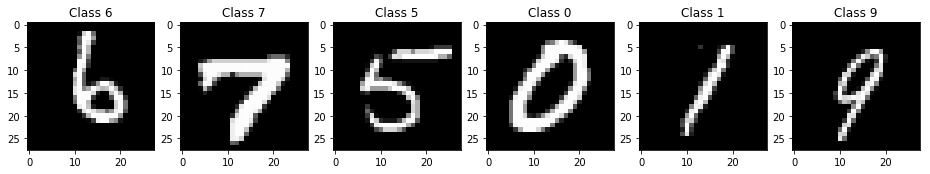

In [4]:
num_figures = 6
plt.figure(figsize=(16,8))
for i in range(num_figures):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_raw[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_raw[i]))

## Reshape The Data
We begin by reshaping the raw data given to us in a *6500x28x28* array into three classes:
* **X_train** - The training set which is composed of 60%, or 3900 images, of the raw image data.
* **X_valid** - The validation set which is composed of 15%, or 975 images, of the raw image data.
* **X_test** - The test set which is composed of 25%, or 1625 images, of the raw image data.

For each of these sets, we reshape the *28x28* images into a *1x784* array.

Because of the nature of Keras, we have to reshape our label data to be in a 10x1 array, where each label is at its value index. For example, the label `4` would be reshaped to be `[0,0,0,0,1,0,0,0,0]`.

In [5]:
# Split and reshape the images into test, validation, and test sets
X_train = X_raw[0:3900].reshape(3900, 784)
X_valid = X_raw[3900:4875].reshape(975, 784)
X_test = X_raw[4875:6500].reshape(1625, 784)

# Split the labels into test, validation, and test sets and put them in a vertical array of length 10
y_train = np_utils.to_categorical(y_raw[0:3900], 10)
y_valid = np_utils.to_categorical(y_raw[3900:4875], 10)
y_test = np_utils.to_categorical(y_raw[4875:6500], 10)
y_test_raw = y_raw[4875:6500]

# Reformat the images from 0-255 integers to 0-1 floats
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255

# Print the shape of the new images
print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_valid.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (3900, 784)
Validation matrix shape (975, 784)
Testing matrix shape (1625, 784)


## Build Our Model
For our neural network model, it is initially given an input layer of 784 nodes, then passes through two hidden layers of 512 ndoes, eventually reaching an output layer of 10 nodes, each of the final nodes representing a class between 0-9 to represent the numbers of the images. 

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

Next, we compile our model using te `binary_crossentropy` loss function, an `adam` optimizer, and using the accuracy of each epoch as our metric.

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Structure

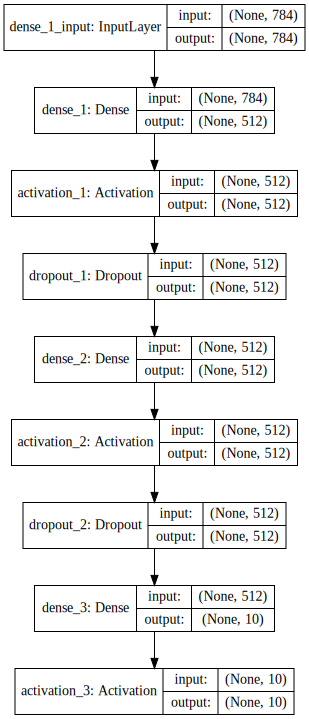

In [8]:
SVG(model_to_dot(model, show_shapes=True, rankdir='TD').create(prog='dot', format='svg'))

## Train the Model

Below 100 epochs of the model are run with a batch size of 128. The overall accuracy of the model was improved to be nearly perfect by the end of the epochs. 

In [9]:
history = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=100,
          verbose=1,
          validation_data=(X_valid, y_valid))

Train on 3900 samples, validate on 975 samples
Epoch 1/100
3900/3900 [==============================] - 2s 515us/step - loss: 0.1394 - acc: 0.9496 - val_loss: 0.0614 - val_acc: 0.9795
Epoch 2/100
3900/3900 [==============================] - 0s 31us/step - loss: 0.0546 - acc: 0.9815 - val_loss: 0.0437 - val_acc: 0.9869
Epoch 3/100
3900/3900 [==============================] - 0s 36us/step - loss: 0.0372 - acc: 0.9878 - val_loss: 0.0391 - val_acc: 0.9896
Epoch 4/100
3900/3900 [==============================] - 0s 31us/step - loss: 0.0274 - acc: 0.9911 - val_loss: 0.0385 - val_acc: 0.9886
Epoch 5/100
3900/3900 [==============================] - 0s 36us/step - loss: 0.0230 - acc: 0.9925 - val_loss: 0.0374 - val_acc: 0.9884
Epoch 6/100
3900/3900 [==============================] - 0s 31us/step - loss: 0.0165 - acc: 0.9951 - val_loss: 0.0438 - val_acc: 0.9864
Epoch 7/100
3900/3900 [==============================] - 0s 32us/step - loss: 0.0134 - acc: 0.9958 - val_loss: 0.0356 - val_acc: 0.9908


3900/3900 [==============================] - 0s 31us/step - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0661 - val_acc: 0.9887
Epoch 61/100
3900/3900 [==============================] - 0s 27us/step - loss: 4.3337e-04 - acc: 0.9999 - val_loss: 0.0593 - val_acc: 0.9907
Epoch 62/100
3900/3900 [==============================] - 0s 28us/step - loss: 7.7832e-04 - acc: 0.9997 - val_loss: 0.0622 - val_acc: 0.9895
Epoch 63/100
3900/3900 [==============================] - 0s 27us/step - loss: 7.1390e-04 - acc: 0.9997 - val_loss: 0.0644 - val_acc: 0.9906
Epoch 64/100
3900/3900 [==============================] - 0s 28us/step - loss: 8.7488e-04 - acc: 0.9997 - val_loss: 0.0718 - val_acc: 0.9886
Epoch 65/100
3900/3900 [==============================] - 0s 27us/step - loss: 2.8275e-04 - acc: 0.9999 - val_loss: 0.0591 - val_acc: 0.9889
Epoch 66/100
3900/3900 [==============================] - 0s 28us/step - loss: 4.4522e-04 - acc: 0.9998 - val_loss: 0.0697 - val_acc: 0.9889
Epoch 67/100
3900/3900 [======

## Generate Loss and Accuracy Graphs by Epoch

Below we graph the accuracy and loss per epoch for our Artificial Neural Network. Halfway through the program, the accuracy of the middle epochs had a dip in its consistency, however the lowest value was just over 94%, which is an impressive lowest value. 

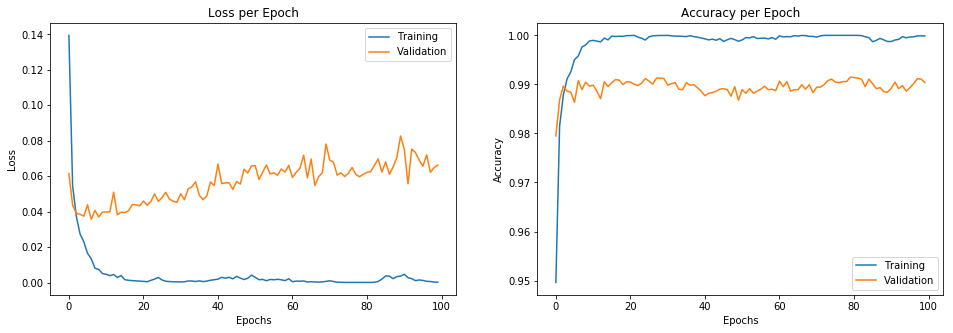

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.subplot(1,2,2)
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

## Print End Result Accuracy

Overall, our ANN's accuracy on the testing set finished at 99.29%, giving a conclusive success on our model's algorithm. 

Further below is a confusion matrix demonstrating our model's prediction score. It shows that it was very consistent throughout the entire run. 

In [11]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

1625/1625 [==============================] - 0s 51us/step
Test score: 0.04920733699913567
Test accuracy: 0.992000004695012


## Confusion Matrix

Text(0.5,1,'Confusion Matrix')

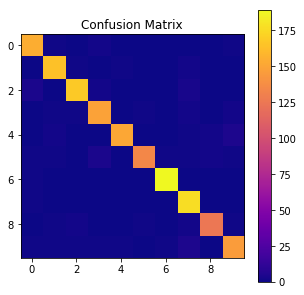

In [12]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

cnf_matrix_dt = confusion_matrix(y_test_raw, y_pred.argmax(axis=1))
plt.figure(figsize=(5,5))
plt.imshow(cnf_matrix_dt, cmap='plasma')
plt.colorbar()
plt.title("Confusion Matrix")

## Default Precision-Recall
Here we have the precision-recall report for each of the classes.

In [14]:
print(classification_report(y_test_raw, y_pred.argmax(axis=1)))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       159
          1       0.96      0.98      0.97       168
          2       0.97      0.95      0.96       177
          3       0.94      0.96      0.95       156
          4       0.99      0.94      0.96       162
          5       0.99      0.92      0.95       146
          6       0.99      0.99      0.99       190
          7       0.92      0.99      0.95       178
          8       0.97      0.95      0.96       132
          9       0.94      0.93      0.93       157

avg / total       0.96      0.96      0.96      1625



## Display Correct Prediction Examples

In [15]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test_raw)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_raw)[0]

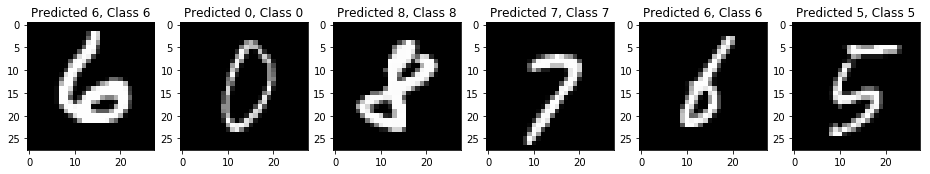

In [16]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, correct in enumerate(correct_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test_raw[correct]))

## Display Incorrect Prediction Examples

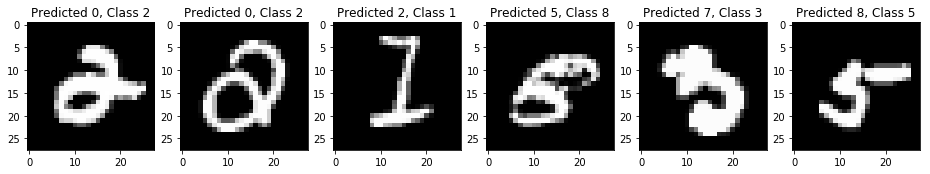

In [17]:
num_figures = 6
plt.figure(figsize=(16,8))
for i, incorrect in enumerate(incorrect_indices[:num_figures]):
    plt.subplot(1,num_figures,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test_raw[incorrect]))

## Evaluation of Incorrect Prediction

Above are six examples of the algorithm incorrectly predicting certain numbers within the data given. The neural network had difficulties in determining when a curve or line was connected to another or not, and did not accurately locate smaller gaps between lines (as in the third example, where it assumed an '8' and didn't notice the small gap making it a '2'). It also had trouble recognizing less common ways to write certain numbers. It was correctly able to identify a single vertical line as being a '1', but when written as a typed '1', like in example 4, it failed. The algorithm also could not accurately identify numbers that were blurry or poorly written, as the grayscale had a harder time determining separations between lines, as is the case in the final two examples.